In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from env import get_db_url

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format


In [2]:
df = pd.read_csv('zillow.csv')

In [3]:
df.head()

,Unnamed: 0,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,0,1727539,14297519,3.50,4.00,3.50,"3,100.00","3,100.00","6,059.00",3.00,...,"1,998.00","485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0.03,2017-01-01,Single Family Residential
1,1,1387261,17052889,1.00,2.00,1.00,"1,465.00","1,465.00","6,111.00",1.00,...,"1,967.00","88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",0.06,2017-01-01,Single Family Residential
2,2,11677,14186244,2.00,3.00,2.00,"1,243.00","1,243.00","6,059.00",2.00,...,"1,962.00","85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",0.01,2017-01-01,Single Family Residential
3,3,2288172,12177905,3.00,4.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,...,"1,970.00","108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01,Single Family Residential
4,4,781532,12095076,3.00,4.00,3.00,"2,962.00","2,962.00","6,037.00",3.00,...,"1,950.00","276,684.00","773,303.00","2,016.00","496,619.00","9,516.26","60,374,608,001,014.00",-0.00,2017-01-01,Single Family Residential


In [4]:
df = df[df['bedroomcnt']<=6]
df = df[df['bathroomcnt']<=6]
df = df[df['calculatedfinishedsquarefeet']<=10000]
df = df.dropna()
#df = df[df.fips.astype(int)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50245 entries, 0 to 52316
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    50245 non-null  int64  
 1   id                            50245 non-null  int64  
 2   parcelid                      50245 non-null  int64  
 3   bathroomcnt                   50245 non-null  float64
 4   bedroomcnt                    50245 non-null  float64
 5   calculatedbathnbr             50245 non-null  float64
 6   calculatedfinishedsquarefeet  50245 non-null  float64
 7   finishedsquarefeet12          50245 non-null  float64
 8   fips                          50245 non-null  float64
 9   fullbathcnt                   50245 non-null  float64
 10  latitude                      50245 non-null  float64
 11  longitude                     50245 non-null  float64
 12  lotsizesquarefeet             50245 non-null  float64
 13  p

## Is logerror significantly different in LA County vs Orange County vs Ventura County?

In [5]:
train, test_validate = train_test_split(df, train_size=.7, random_state=123)

In [6]:
test, validate = train_test_split(test_validate, train_size=.5, random_state=123)

In [7]:
#train.info()

In [8]:
#validate.info()

In [9]:
#test.info()

<AxesSubplot:xlabel='fips', ylabel='logerror'>

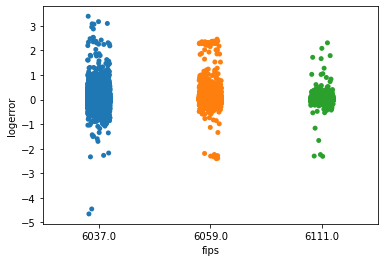

In [10]:
sns.stripplot(train.fips, train.logerror)

In [11]:
t, p = stats.ttest_1samp(train.fips, train.logerror)
t, p

(46411              53,430.60
 12234              53,429.82
 39348              53,427.41
 40754              53,429.72
 40953              53,430.17
                 ...         
 8090               53,430.93
 16014              53,429.89
 18457              53,430.56
 29173              53,429.97
 16378              53,429.52
 Name: logerror, Length: 35171, dtype: float64,
 array([0., 0., 0., ..., 0., 0., 0.]))

In [12]:
f, p = stats.f_oneway(train.fips, train.logerror)
f, p

(2854558451.6063538, 0.0)

# Are bathroomcnt and logerror related?

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

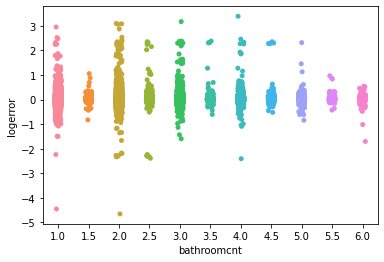

In [13]:
sns.stripplot(train.bathroomcnt, train.logerror)

# Are bedroomcnt and logerror related?

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

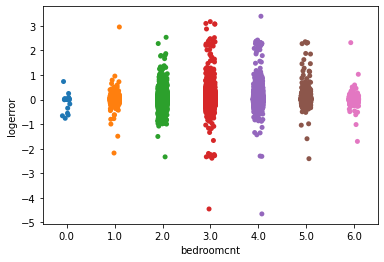

In [14]:
sns.stripplot(train.bedroomcnt, train.logerror)

# Does calculatedfinishedsquarefeet and logerror have a relationship?

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

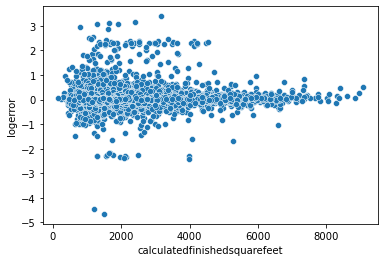

In [15]:
sns.scatterplot(train.calculatedfinishedsquarefeet, train.logerror)

In [16]:
corr, p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.logerror)
corr, p

(0.03297244998729694, 6.206586933052306e-10)

> Yes our pval is less than alpha but we need to cluster. Correlation test does not show a strong linear relationships but there is a relationship.

# Does yearbuilt and logerror have a relationship?

<AxesSubplot:xlabel='yearbuilt', ylabel='logerror'>

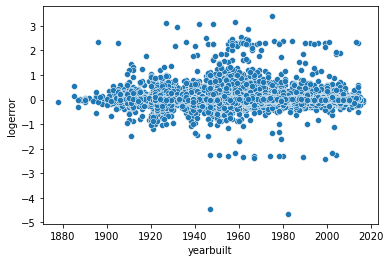

In [17]:
sns.scatterplot(train.yearbuilt, train.logerror)

In [18]:
corr, p = stats.pearsonr(train.yearbuilt, train.logerror)
corr, p

(0.011547203196669567, 0.030345593311376914)

> Yes our pval is less than alpha but we need to cluster. Correlation test does not show a strong linear relationships but there is a relationship.

In [23]:
scaler = sklearn.preprocessing.MinMaxScaler()
cols_scaled = train[['logerror','yearbuilt', 'calculatedfinishedsquarefeet']]
scaler.fit(cols_scaled)

train_scaled = scaler.transform(cols_scaled)

In [24]:
cols_scaled

,logerror,yearbuilt,calculatedfinishedsquarefeet
46411,-0.06,"1,961.00","1,451.00"
12234,0.03,"1,967.00","2,145.00"
39348,0.30,"1,930.00","1,069.00"
40754,0.04,"1,981.00","3,190.00"
40953,-0.01,"2,001.00","1,825.00"
...,...,...,...
8090,-0.10,"1,963.00","1,144.00"
16014,0.02,"1,988.00","1,379.00"
18457,-0.06,"1,979.00","1,848.00"
29173,0.01,"1,964.00","1,630.00"


# stat tests scaled

In [26]:
#calculatedfinishedsquarefeet and logerror
corr, p = stats.pearsonr(cols_scaled.calculatedfinishedsquarefeet, cols_scaled.logerror)
corr, p

(0.03297244998729694, 6.206586933052306e-10)

In [28]:
#yearbuilt and logerror
corr, p = stats.pearsonr(cols_scaled.yearbuilt, cols_scaled.logerror)
corr, p

(0.011547203196669567, 0.030345593311376914)